<a href="https://colab.research.google.com/github/iimog/master-bioinf-ws22/blob/main/3-ML-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Cats vs Dogs

## Data Loading

In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.PETS)

In [ ]:
path

Path('/root/.fastai/data/oxford-iiit-pet')

In [ ]:
files = get_image_files(path/"images")

In [ ]:
files

(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_183.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_70.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_26.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_67.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_153.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_27.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_173.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_110.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_102.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_91.jpg')...]

In [ ]:
import skimage.io
import matplotlib.pyplot as plt

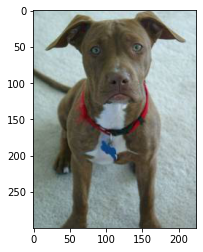

In [ ]:
img = skimage.io.imread("/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_183.jpg")
plt.imshow(img)

In [ ]:
img.shape

(300, 225, 3)

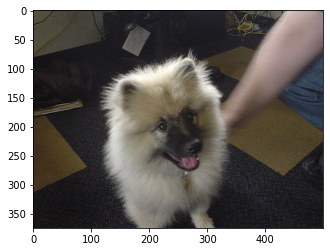

In [ ]:
img = skimage.io.imread(files[70])
plt.imshow(img)

## Label Generation

In [ ]:
def cat_or_dog(filename):
  if filename[0].isupper():
    return "cat"
  else:
    return "dog"

In [ ]:
cat_or_dog("american_pit_bull_terrier_183.jpg")

'dog'

In [ ]:
cat_or_dog("Abyssinian_1.jpg")

'cat'

## Create Dataloaders

In [22]:
dls = ImageDataLoaders.from_name_func(path, files, cat_or_dog, item_tfms=Resize(224))

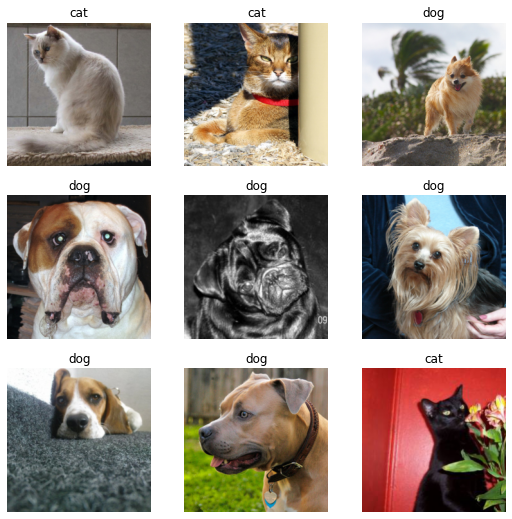

In [28]:
dls.show_batch()

Training DataLoader

In [24]:
dls[0].n

5912

Validation DataLoader

In [25]:
dls[1].n

1478

## Define Learner

In [29]:
learner = vision_learner(dls, resnet34, metrics=accuracy)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

## Performance before training

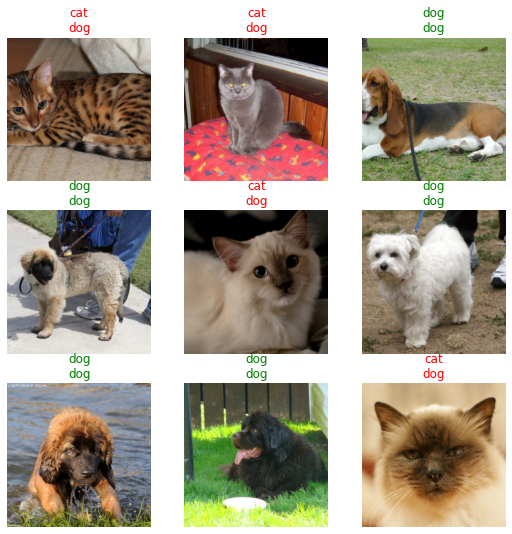

In [31]:
learner.show_results()

In [32]:
learner.validate()

(#2) [2.324681043624878,0.6610284447669983]

## Training

In [33]:
learner.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.162479,0.015012,0.994587,00:49


epoch,train_loss,valid_loss,accuracy,time
0,0.052253,0.012316,0.993911,00:51


## Evaluate results

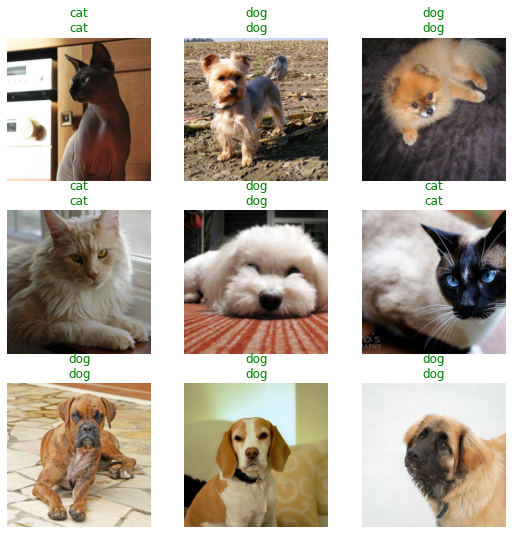

In [34]:
learner.show_results()

In [35]:
interpret = ClassificationInterpretation.from_learner(learner)

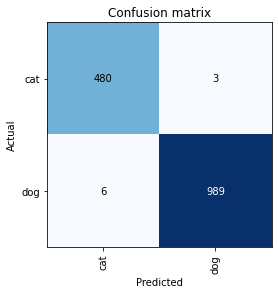

In [36]:
interpret.plot_confusion_matrix()

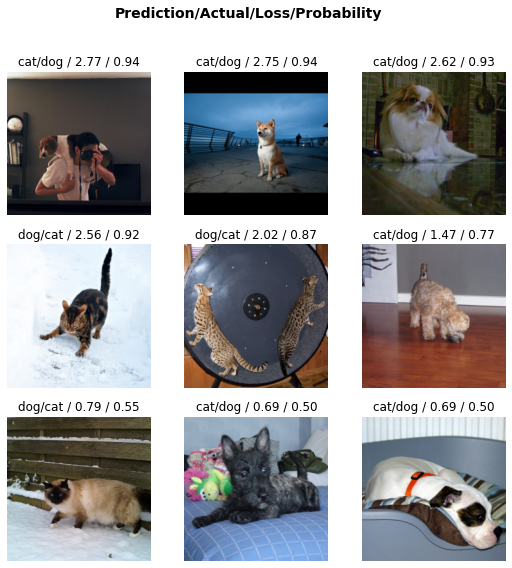

In [38]:
interpret.plot_top_losses(9)

In [39]:
learner.loss_func

FlattenedLoss of CrossEntropyLoss()

## Make predictions on completely new images

In [40]:
img = skimage.io.imread("https://www.kindernetz.de/wissen/tierlexikon/1655279778114,steckbrief-katze-102~_v-16x9@2dL_-6c42aff4e68b43c7868c3240d3ebfa29867457da.jpg")

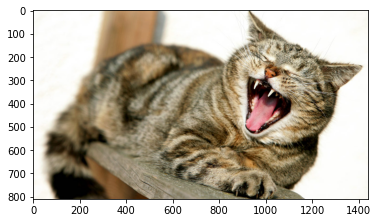

In [41]:
plt.imshow(img)

In [42]:
learner.predict(img)

('cat', TensorBase(0), TensorBase([1.0000e+00, 3.0800e-13]))

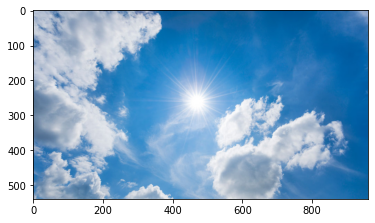

In [43]:
img = skimage.io.imread("https://www.planet-wissen.de/natur/weltall/universum/einblickzumhimmel100~_v-ARDFotogalerie.jpg")
plt.imshow(img)

In [44]:
learner.predict(img)

('cat', TensorBase(0), TensorBase([0.9234, 0.0766]))

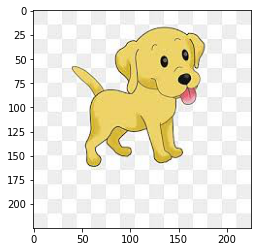

In [50]:
img = skimage.io.imread("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQyYegXfCMOvy29iomKrd15gxUaxrF3q8Qd2g&usqp=CAU")
plt.imshow(img)

In [52]:
learner.predict(img)

('dog', TensorBase(1), TensorBase([0.1806, 0.8194]))